In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

expenses = pd.read_csv('new_data/expenses_df.csv')
min_wage = pd.read_csv('new_data/min_wage_df.csv')
poverty_line = pd.read_csv('new_data/pov_df.csv')
wage = pd.read_csv('new_data/wage_df.csv')

expenses

,province,year,expenses
0,ACEH,2015,2403737.0
1,ACEH,2016,2601520.0
2,ACEH,2017,2871016.0
3,ACEH,2018,3083019.0
4,ACEH,2019,3128927.0
...,...,...,...
275,SUMATERA UTARA,2018,2989537.0
276,SUMATERA UTARA,2019,3166258.0
277,SUMATERA UTARA,2020,3342542.0
278,SUMATERA UTARA,2021,3392998.0


In [22]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  280 non-null    object 
 1   year      280 non-null    int64  
 2   expenses  280 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.7+ KB


In [28]:
print(expenses.iloc[expenses['expenses'].idxmax()])
print(expenses.iloc[expenses['expenses'].idxmin()])

province    KALIMANTAN TIMUR
year                    2022
expenses           5210878.0
Name: 127, dtype: object
province    NUSA TENGGARA TIMUR
year                       2015
expenses              1856694.0
Name: 184, dtype: object


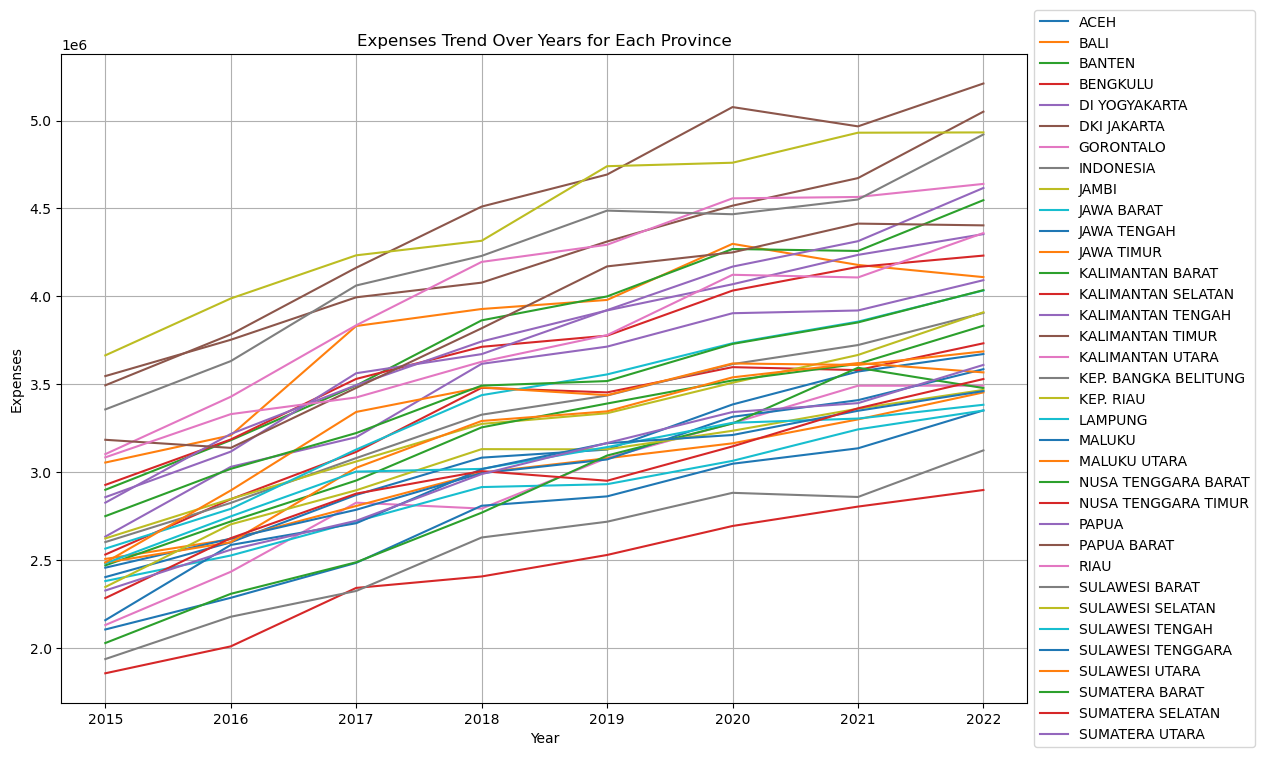

In [29]:
plt.figure(figsize=(15, 8))

for province in expenses['province'].unique():
    province_data = expenses[expenses['province'] == province]
    plt.plot(province_data['year'], province_data['expenses'], label=province)

# Add title and labels
plt.title('Expenses Trend Over Years for Each Province')
plt.xlabel('Year')
plt.ylabel('Expenses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [2]:
min_wage

,province,year,min_wage
0,ACEH,2015,1900000.0
1,ACEH,2016,2118500.0
2,ACEH,2017,2500000.0
3,ACEH,2018,2700000.0
4,ACEH,2019,2916810.0
...,...,...,...
275,INDONESIA,2018,2268874.0
276,INDONESIA,2019,2455662.0
277,INDONESIA,2020,2672371.0
278,INDONESIA,2021,2684743.0


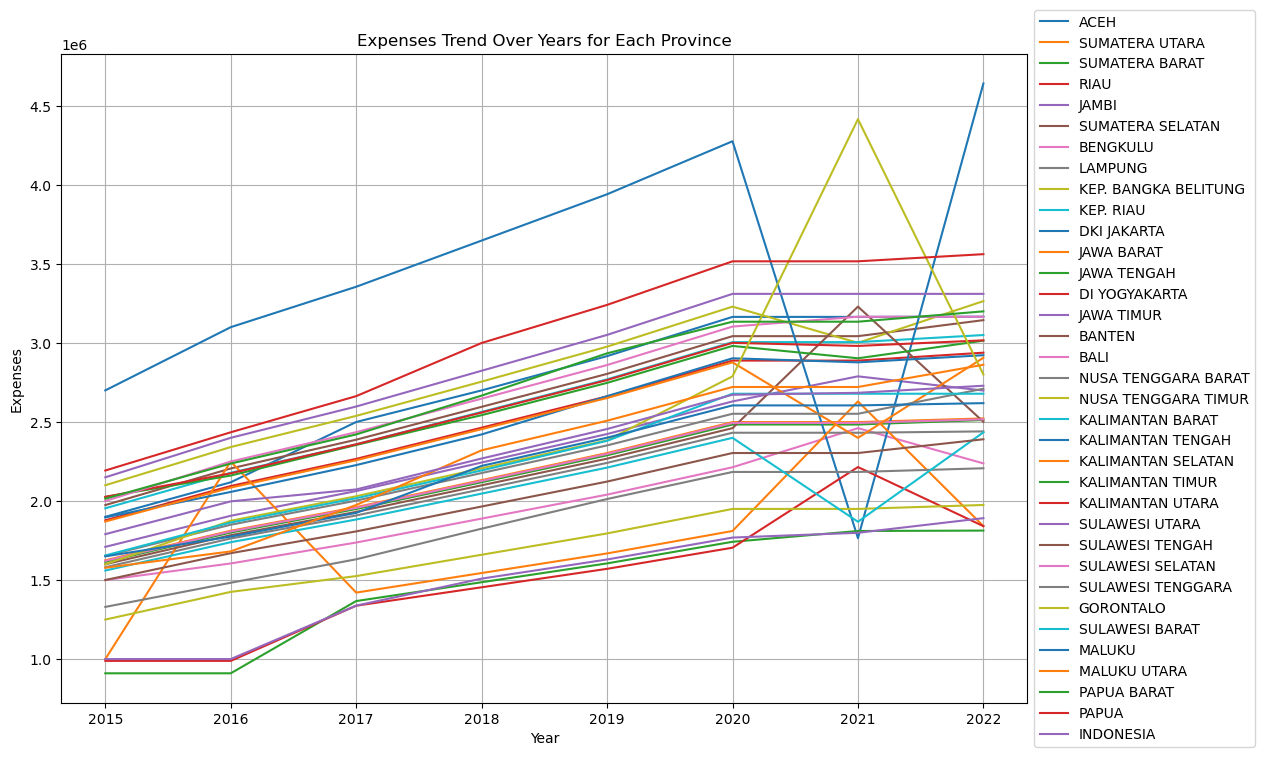

In [30]:
plt.figure(figsize=(15, 8))

# Plot each province's expenses over the years
for province in min_wage['province'].unique():
    province_data = min_wage[min_wage['province'] == province]
    plt.plot(province_data['year'], province_data['min_wage'], label=province)

# Add title and labels
plt.title('Expenses Trend Over Years for Each Province')
plt.xlabel('Year')
plt.ylabel('Expenses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [4]:
poverty_line

,province,year,poverty_line_avg,poverty_line_max
0,ACEH,2015,799732.0,830738.0
1,ACEH,2016,842996.7,873458.0
2,ACEH,2017,898686.7,937883.0
3,ACEH,2018,948787.7,983090.0
4,ACEH,2019,996016.7,1019517.0
...,...,...,...,...
275,SUMATERA UTARA,2018,886291.3,914153.0
276,SUMATERA UTARA,2019,954269.0,990205.0
277,SUMATERA UTARA,2020,1006082.0,1038747.0
278,SUMATERA UTARA,2021,1060420.3,1099522.0


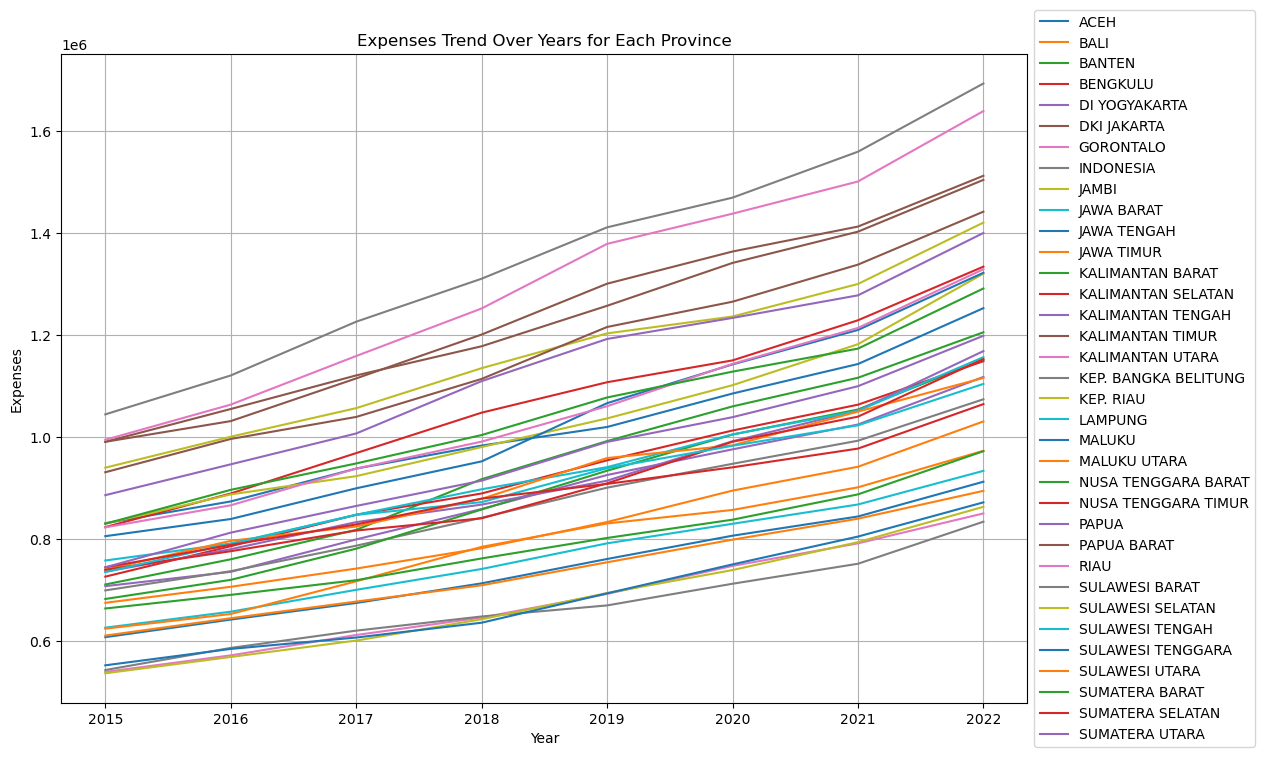

In [31]:
plt.figure(figsize=(15, 8))

# Plot each province's expenses over the years
for province in poverty_line['province'].unique():
    province_data = poverty_line[poverty_line['province'] == province]
    plt.plot(province_data['year'], province_data['poverty_line_max'], label=province)

# Add title and labels
plt.title('Expenses Trend Over Years for Each Province')
plt.xlabel('Year')
plt.ylabel('Expenses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [3]:
wage

,province,year,wage
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065
...,...,...,...
275,INDONESIA,2018,15275
276,INDONESIA,2019,15823
277,INDONESIA,2020,17696
278,INDONESIA,2021,18089


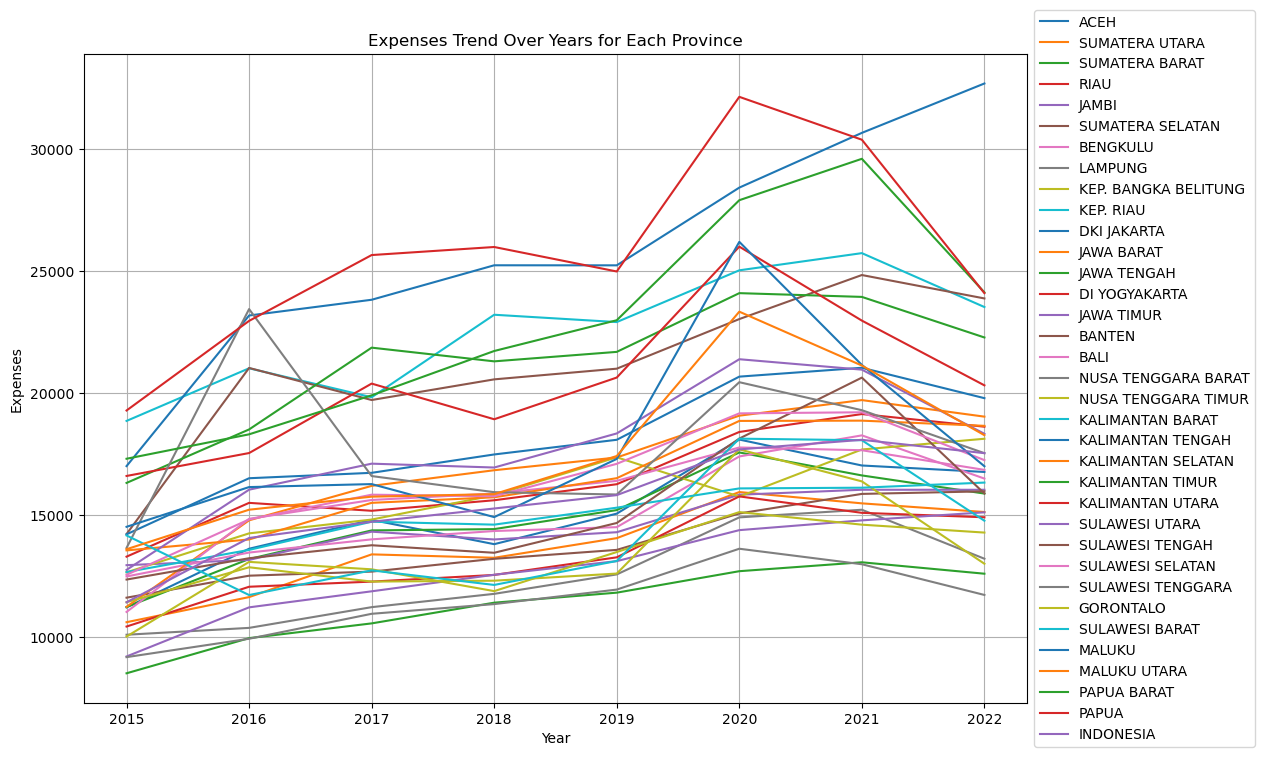

In [33]:
plt.figure(figsize=(15, 8))

# Plot each province's expenses over the years
for province in wage['province'].unique():
    province_data = wage[wage['province'] == province]
    plt.plot(province_data['year'], province_data['wage'], label=province)

# Add title and labels
plt.title('Expenses Trend Over Years for Each Province')
plt.xlabel('Year')
plt.ylabel('Expenses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()